In [3]:
import pandas as pd

In [20]:
df = pd.read_csv('FilmPreferences2123.csv')

In [21]:
df

,sex,age,educat,income,thriller,horror,comedy,adventur,docu,roman,munt,movies,tuschin,arena
0,0.0,25.0,2.0,2000.0,6.0,3.0,6.0,6.0,9.0,6.0,0.0,0.0,0.0,0.0
1,0.0,33.0,2.0,2350.0,4.0,2.0,7.0,8.0,4.0,7.0,0.0,0.0,0.0,1.0
2,0.0,44.0,3.0,4500.0,6.0,3.0,7.0,8.0,8.0,7.0,1.0,1.0,1.0,0.0
3,0.0,53.0,3.0,5800.0,4.0,1.0,5.0,9.0,7.0,4.0,1.0,1.0,1.0,0.0
4,0.0,64.0,2.0,4450.0,5.0,4.0,6.0,9.0,9.0,8.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,18.0,1.0,380.0,7.0,6.0,7.0,7.0,8.0,8.0,0.0,1.0,1.0,0.0
146,1.0,19.0,1.0,290.0,9.0,10.0,8.0,7.0,5.0,6.0,1.0,0.0,0.0,1.0
147,1.0,20.0,2.0,1150.0,10.0,4.0,8.0,7.0,6.0,8.0,1.0,0.0,1.0,0.0
148,1.0,21.0,2.0,1000.0,7.0,3.0,5.0,9.0,6.0,5.0,1.0,0.0,1.0,1.0


In [25]:
seldata = df[['munt','movies','tuschin','arena']]
seldata

,munt,movies,tuschin,arena
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
145,0.0,1.0,1.0,0.0
146,1.0,0.0,0.0,1.0
147,1.0,0.0,1.0,0.0
148,1.0,0.0,1.0,1.0


In [23]:
from statsmodels.stats.contingency_tables import cochrans_q

In [24]:
print(cochrans_q(seldata))
# pvalue es muy bajo (significancia)
#q-value es 19.38

df          3
pvalue      0.00022763307854354147
statistic   19.384615384615383


------------------

En mi opinión, la prueba Q de Dixon solo debe usarse con mucha precaución, ya que esta estadística simple 
se basa en la suposición de que los datos tienen una distribución normal, lo que puede ser bastante difícil 
de predecir para tamaños de muestra pequeños (si no hay datos previos / adicionales). se proporciona información). 
Personalmente, usaría la prueba Dixon Q solo para detectar valores atípicos y no para eliminarlos, lo que puede ayudar
con la identificación de incertidumbres en el conjunto de datos o problemas en procedimientos experimentales. 
Intuitivamente, esto es bastante similar a un enfoque para identificar muestras que tienen una gran desviación estándar.

https://sebastianraschka.com/Articles/2014_dixon_test.html#implementing-a-dixon-q-test-function

1) Se debe ordenar los datos de menos a mayor
2) Calcular el valor Q

In [26]:
#diccionario de valores q
q90 = [0.941, 0.765, 0.642, 0.56, 0.507, 0.468, 0.437,
       0.412, 0.392, 0.376, 0.361, 0.349, 0.338, 0.329,
       0.32, 0.313, 0.306, 0.3, 0.295, 0.29, 0.285, 0.281,
       0.277, 0.273, 0.269, 0.266, 0.263, 0.26
      ]

q95 = [0.97, 0.829, 0.71, 0.625, 0.568, 0.526, 0.493, 0.466,
       0.444, 0.426, 0.41, 0.396, 0.384, 0.374, 0.365, 0.356,
       0.349, 0.342, 0.337, 0.331, 0.326, 0.321, 0.317, 0.312,
       0.308, 0.305, 0.301, 0.29
      ]

q99 = [0.994, 0.926, 0.821, 0.74, 0.68, 0.634, 0.598, 0.568,
       0.542, 0.522, 0.503, 0.488, 0.475, 0.463, 0.452, 0.442,
       0.433, 0.425, 0.418, 0.411, 0.404, 0.399, 0.393, 0.388,
       0.384, 0.38, 0.376, 0.372
       ]
Q90 = {n:q for n,q in zip(range(3,len(q90)+1), q90)}
Q95 = {n:q for n,q in zip(range(3,len(q95)+1), q95)}
Q99 = {n:q for n,q in zip(range(3,len(q99)+1), q99)}

In [27]:
#implementacion de la funcion Q-test
def dixon_test(data, left=True, right=True, q_dict=Q95):
    """
    Keyword arguments:
        data = A ordered or unordered list of data points (int or float).
        left = Q-test of minimum value in the ordered list if True.
        right = Q-test of maximum value in the ordered list if True.
        q_dict = A dictionary of Q-values for a given confidence level,
            where the dict. keys are sample sizes N, and the associated values
            are the corresponding critical Q values. E.g.,
            {3: 0.97, 4: 0.829, 5: 0.71, 6: 0.625, ...}

    Returns a list of 2 values for the outliers, or None.
    E.g.,
       for [1,1,1] -> [None, None]
       for [5,1,1] -> [None, 5]
       for [5,1,5] -> [1, None]

    """
    assert(left or right), 'At least one of the variables, `left` or `right`, must be True.'
    assert(len(data) >= 3), 'At least 3 data points are required'
    assert(len(data) <= max(q_dict.keys())), 'Sample size too large'

    sdata = sorted(data)
    Q_mindiff, Q_maxdiff = (0,0), (0,0)

    if left:
        Q_min = (sdata[1] - sdata[0])
        try:
            Q_min /= (sdata[-1] - sdata[0])
        except ZeroDivisionError:
            pass
        Q_mindiff = (Q_min - q_dict[len(data)], sdata[0])

    if right:
        Q_max = abs((sdata[-2] - sdata[-1]))
        try:
            Q_max /= abs((sdata[0] - sdata[-1]))
        except ZeroDivisionError:
            pass
        Q_maxdiff = (Q_max - q_dict[len(data)], sdata[-1])

    if not Q_mindiff[0] > 0 and not Q_maxdiff[0] > 0:
        outliers = [None, None]

    elif Q_mindiff[0] == Q_maxdiff[0]:
        outliers = [Q_mindiff[1], Q_maxdiff[1]]

    elif Q_mindiff[0] > Q_maxdiff[0]:
        outliers = [Q_mindiff[1], None]

    else:
        outliers = [None, Q_maxdiff[1]]

    return outliers

In [30]:
#pruebas
test_data1 = [0.142, 0.153, 0.135, 0.002, 0.175]
test_data2 = [0.542, 0.153, 0.135, 0.002, 0.175]

assert(dixon_test(test_data1) == [0.002, None]), 'expect [0.002, None]'
assert(dixon_test(test_data1, right=False) == [0.002, None]), 'expect [0.002, None]'
assert(dixon_test(test_data2) == [None, None]), 'expect [None, None]'
assert(dixon_test(test_data2, q_dict=Q90) == [None, 0.542]), 'expect [None, 0.542]'

print('ok')

ok


In [31]:
import csv

In [32]:
def csv_to_list(csv_file, delimiter=','):
    """
    Reads in a CSV file and returns the contents as list,
    where every row is stored as a sublist, and each element
    in the sublist represents 1 cell in the table.

    """
    with open(csv_file, 'r') as csv_con:
        reader = csv.reader(csv_con, delimiter=delimiter)
        return list(reader)
    
def print_csv(csv_content):
    """ Prints CSV file to standard output."""
    print(50*'-')
    for row in csv_content:
        row = [str(e) for e in row]
        print('t'.join(row))
    print(50*'-')


def convert_cells_to_floats(csv_cont):
    """
    Converts cells to floats if possible
    (modifies input CSV content list).

    """
    for row in range(len(csv_cont)):
        for cell in range(len(csv_cont[row])):
            try:
                csv_cont[row][cell] = float(csv_cont[row][cell])
            except ValueError:
                pass

In [33]:
csv_cont = csv_to_list('dixon-q-test.csv')
convert_cells_to_floats(csv_cont)
print_csv(csv_cont)

--------------------------------------------------
tx1tx2tx3tx4tx5
id1t0.95t-0.65t0.6t0.82tnan
id2t2.08tnant-1.43t0.38tnan
id3t-0.46tnant-1.25t-2.62t0.22
id4t0.24t1.88t-0.49t-0.73t-0.49
id5t-1.65t2.1t-0.09tnant0.8
id6t-0.44t0.93t0.19t-4.36t-0.88
id7t0.36t-0.47tnant0.4t2.12
id8t1.29t-0.48t-0.6t-0.38t0.27
id9t-1.25t-1.35t1.13t1.7t-0.81
id10t0.04t1.98tnantnantnan
--------------------------------------------------


In [34]:
import math

csv_cont[0].append('outlier')

for row in csv_cont[1:]: # skips header
    nan_removed = [i for i in row[1:] if not math.isnan(i)]
    if len(nan_removed) >= 3:
        row.append(dixon_test(nan_removed, left=True, right=True, q_dict=Q90))
    else:
        row.append('NaN')

In [35]:
print_csv(csv_cont)


--------------------------------------------------
tx1tx2tx3tx4tx5toutlier
id1t0.95t-0.65t0.6t0.82tnant[-0.65, None]
id2t2.08tnant-1.43t0.38tnant[None, None]
id3t-0.46tnant-1.25t-2.62t0.22t[None, None]
id4t0.24t1.88t-0.49t-0.73t-0.49t[None, None]
id5t-1.65t2.1t-0.09tnant0.8t[None, None]
id6t-0.44t0.93t0.19t-4.36t-0.88t[-4.36, None]
id7t0.36t-0.47tnant0.4t2.12t[None, None]
id8t1.29t-0.48t-0.6t-0.38t0.27t[None, None]
id9t-1.25t-1.35t1.13t1.7t-0.81t[None, None]
id10t0.04t1.98tnantnantnantNaN
--------------------------------------------------


In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
all_means = [np.nanmean(row[1:6]) for row in csv_cont[1:]]
all_stddevs = [np.nanstd(row[1:6]) for row in csv_cont[1:]]

fig = plt.figure(figsize=(8,6))

y_pos = np.arange(len(csv_cont[1:]))
y_pos = [x for x in y_pos]
plt.yticks(y_pos, [row[0] for row in csv_cont[1:]], fontsize=10)
plt.xlabel('measurement x')
t = plt.title('Bar plot with standard deviation')

plt.grid()
plt.barh(y_pos, all_means, xerr=all_stddevs, align='center', alpha=0.4, color='g')

plt.show()

NameError: name 'csv_cont' is not defined

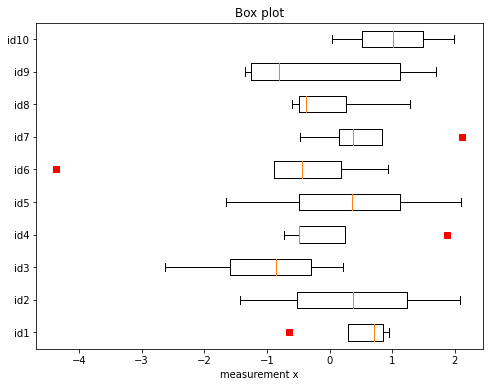

In [37]:
csv_nonan = [[x for x in row[1:6] if not math.isnan(x)] for row in csv_cont[1:]]
fig = plt.figure(figsize=(8,6))
plt.boxplot(csv_nonan,0,'rs',0)
plt.yticks([y+1 for y in y_pos], [row[0] for row in csv_cont[1:]])
plt.xlabel('measurement x')
t = plt.title('Box plot')
plt.show()

------------------------------

https://plotly.com/python/v3/outlier-test/#q-test

In [10]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
df = data[0:10]

In [8]:
df

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5
5,2.30,2001-06-11 11:50,25.2
6,2.46,2001-06-11 12:00,24.8
7,1.87,2001-06-11 12:10,24.0
8,1.71,2001-06-11 12:20,22.9
9,1.76,2001-06-11 12:30,17.9


# Q-test or Dixon´s test

In [21]:
def q_test_for_smallest_point(dataset):
    q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
    q_stat = (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])

    if q_stat > q_ref:
        print("Since our Q-statistic is {} and {} > {}, we have evidence that our "
              "minimum point IS an outlier to the data.".format(q_stat, q_stat, q_ref))
    else:
        print("Since our Q-statistic is {} and {} > {}, we have evidence that our "
              "minimum point is NOT an outlier to the data.".format(q_stat, q_stat, q_ref))

In [19]:
dataset = data[100:130]['10 Min Sampled Avg'].values.tolist()
dataset

[12.1,
 12.3,
 12.3,
 12.2,
 11.8,
 9.3,
 8.7,
 9.5,
 8.9,
 7.2,
 8.0,
 7.9,
 5.5,
 4.9,
 8.9,
 8.6,
 12.1,
 15.0,
 13.8,
 14.9,
 15.9,
 19.6,
 24.9,
 19.2,
 21.7,
 13.5,
 17.2,
 28.5,
 29.9,
 30.9]

In [20]:
dataset.sort()
dataset

[4.9,
 5.5,
 7.2,
 7.9,
 8.0,
 8.6,
 8.7,
 8.9,
 8.9,
 9.3,
 9.5,
 11.8,
 12.1,
 12.1,
 12.2,
 12.3,
 12.3,
 13.5,
 13.8,
 14.9,
 15.0,
 15.9,
 17.2,
 19.2,
 19.6,
 21.7,
 24.9,
 28.5,
 29.9,
 30.9]

In [22]:
q_test_for_smallest_point(dataset)

Since our Q-statistic is 0.023076923076923064 and 0.023076923076923064 > 0.29, we have evidence that our minimum point is NOT an outlier to the data.


In [27]:
data1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
df1 = data1[0:30]
df1

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5
5,2.30,2001-06-11 11:50,25.2
6,2.46,2001-06-11 12:00,24.8
7,1.87,2001-06-11 12:10,24.0
8,1.71,2001-06-11 12:20,22.9
9,1.76,2001-06-11 12:30,17.9


In [30]:
dataset1 = data1['10 Min Sampled Avg'].values.tolist()
dataset1.sort()
dataset1

[4.9,
 5.5,
 7.2,
 7.9,
 8.0,
 8.6,
 8.7,
 8.7,
 8.9,
 8.9,
 9.3,
 9.5,
 9.6,
 10.0,
 10.7,
 11.3,
 11.3,
 11.4,
 11.8,
 11.8,
 12.1,
 12.1,
 12.1,
 12.2,
 12.2,
 12.3,
 12.3,
 12.3,
 12.5,
 12.8,
 13.0,
 13.3,
 13.5,
 13.6,
 13.8,
 13.8,
 14.0,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.5,
 14.7,
 14.7,
 14.7,
 14.7,
 14.7,
 14.8,
 14.8,
 14.9,
 14.9,
 14.9,
 14.9,
 15.0,
 15.0,
 15.0,
 15.0,
 15.1,
 15.1,
 15.2,
 15.2,
 15.2,
 15.2,
 15.3,
 15.3,
 15.3,
 15.4,
 15.4,
 15.4,
 15.4,
 15.5,
 15.5,
 15.7,
 15.9,
 15.9,
 15.9,
 15.9,
 15.9,
 16.0,
 16.0,
 16.0,
 16.0,
 16.1,
 16.1,
 16.2,
 16.2,
 16.5,
 16.6,
 16.6,
 16.7,
 16.7,
 16.8,
 16.8,
 17.0,
 17.1,
 17.1,
 17.1,
 17.2,
 17.2,
 17.4,
 17.4,
 17.5,
 17.5,
 17.6,
 17.7,
 17.7,
 17.8,
 17.8,
 17.9,
 18.1,
 18.3,
 18.3,
 18.3,
 18.4,
 18.6,
 18.6,
 18.7,
 18.9,
 19.2,
 19.2,
 19.3,
 19.6,
 19.8,
 20.0,
 20.3,
 20.4,
 20.5,
 20.6,
 21.0,
 21.2,
 21.3,
 21.3,
 21.3,
 21.4,
 21.5,
 21.6,
 21.7,
 21.9,
 22.0,
 22.0,
 22.1,
 22.2,
 22.3

In [31]:
q_test_for_smallest_point(dataset1)

Since our Q-statistic is 0.021582733812949624 and 0.021582733812949624 > 0.29, we have evidence that our minimum point is NOT an outlier to the data.


In [39]:
dataset1[0] = -20

In [40]:
dataset1.sort()
dataset1

[-20,
 5.5,
 7.2,
 8.0,
 8.6,
 8.7,
 8.7,
 8.9,
 8.9,
 9.3,
 9.5,
 9.6,
 10.0,
 10.7,
 11.3,
 11.3,
 11.4,
 11.8,
 11.8,
 12.1,
 12.1,
 12.1,
 12.2,
 12.2,
 12.3,
 12.3,
 12.3,
 12.5,
 12.8,
 13.0,
 13.3,
 13.5,
 13.6,
 13.8,
 13.8,
 14.0,
 14.0,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.5,
 14.7,
 14.7,
 14.7,
 14.7,
 14.7,
 14.8,
 14.8,
 14.9,
 14.9,
 14.9,
 14.9,
 15.0,
 15.0,
 15.0,
 15.0,
 15.1,
 15.1,
 15.2,
 15.2,
 15.2,
 15.2,
 15.3,
 15.3,
 15.3,
 15.4,
 15.4,
 15.4,
 15.4,
 15.5,
 15.5,
 15.7,
 15.9,
 15.9,
 15.9,
 15.9,
 15.9,
 16.0,
 16.0,
 16.0,
 16.0,
 16.1,
 16.1,
 16.2,
 16.2,
 16.5,
 16.6,
 16.6,
 16.7,
 16.7,
 16.8,
 16.8,
 17.0,
 17.1,
 17.1,
 17.1,
 17.2,
 17.2,
 17.4,
 17.4,
 17.5,
 17.5,
 17.6,
 17.7,
 17.7,
 17.8,
 17.8,
 17.9,
 18.1,
 18.3,
 18.3,
 18.3,
 18.4,
 18.6,
 18.6,
 18.7,
 18.9,
 19.2,
 19.2,
 19.3,
 19.6,
 19.8,
 20.0,
 20.3,
 20.4,
 20.5,
 20.6,
 21.0,
 21.2,
 21.3,
 21.3,
 21.3,
 21.4,
 21.5,
 21.6,
 21.7,
 21.9,
 22.0,
 22.0,
 22.1,
 22.2,
 22.3,
 22.

In [41]:
q_test_for_smallest_point(dataset1)

Since our Q-statistic is 0.3591549295774648 and 0.3591549295774648 > 0.29, we have evidence that our minimum point IS an outlier to the data.
